In [ ]:
# Link to EPIC_DNN.ipynb

# https://drive.google.com/file/d/1vvWKTzL9OHSezJo6cQb3simfw9zQsxX7/view?usp=sharing

In [ ]:
import pandas as pd

df = pd.read_csv('dataset_EPICA_raw.csv')
df = df.drop(df.columns[0:2], axis=1)
# Take a look at the dataset
df

,TotW,TotVar,A.phsA,Phv.neut.ang,modbus_speed,scada_q2c_sync_activated,q2c_in_sync,gen1_p_negative,gen2_p_negative,status
0,0.000000,0.000000,0.000,0.000000,-7487.0,0,0,0,0,Normal
1,0.000000,0.000000,0.000,0.000000,-7487.0,0,0,0,0,Normal
2,0.000000,0.000000,0.000,0.000000,-7487.0,0,0,0,0,Normal
3,0.000000,0.000000,0.000,0.000000,-7487.0,0,0,0,0,Normal
4,0.000000,0.000000,0.000,0.000000,-7487.0,0,0,0,0,Normal
...,...,...,...,...,...,...,...,...,...,...
22354,814.100525,514.805420,1.350,-0.164185,-7488.0,1,1,1,0,Normal
22355,787.395569,489.114624,1.275,-0.118637,-7489.0,1,1,1,0,Normal
22356,718.387878,536.451843,1.225,-0.127289,-7488.0,1,1,1,0,Normal
22357,827.416687,468.494415,1.275,-0.180862,-7488.0,1,1,1,0,Normal


In [ ]:
import numpy as np

# Clean the dataset and preprocess the label
df = df.dropna()
status = df.columns[-1]
df[status] = df[status].replace({'Normal': 0, 'FDIA': 1, 'TDA': 2})
df

<ipython-input-17-ea9d032ad88c>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[status] = df[status].replace({'Normal': 0, 'FDIA': 1, 'TDA': 2})
<ipython-input-17-ea9d032ad88c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[status] = df[status].replace({'Normal': 0, 'FDIA': 1, 'TDA': 2})


,TotW,TotVar,A.phsA,Phv.neut.ang,modbus_speed,scada_q2c_sync_activated,q2c_in_sync,gen1_p_negative,gen2_p_negative,status
0,0.000000,0.000000,0.000,0.000000,-7487.0,0,0,0,0,0
1,0.000000,0.000000,0.000,0.000000,-7487.0,0,0,0,0,0
2,0.000000,0.000000,0.000,0.000000,-7487.0,0,0,0,0,0
3,0.000000,0.000000,0.000,0.000000,-7487.0,0,0,0,0,0
4,0.000000,0.000000,0.000,0.000000,-7487.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
22354,814.100525,514.805420,1.350,-0.164185,-7488.0,1,1,1,0,0
22355,787.395569,489.114624,1.275,-0.118637,-7489.0,1,1,1,0,0
22356,718.387878,536.451843,1.225,-0.127289,-7488.0,1,1,1,0,0
22357,827.416687,468.494415,1.275,-0.180862,-7488.0,1,1,1,0,0


In [ ]:
# Check data balancing
N_rate, FDIA_rate, TDA_rate = len(df.loc[df.status == 0])/len(df), len(df.loc[df.status == 1])/len(df), len(df.loc[df.status == 2])/len(df)
print(f"Percentage for two status: Normal-{round(N_rate*100, 2)}%; FDIA-{round(FDIA_rate*100, 2)}%; TDA-{round(TDA_rate*100, 2)}%")

Percentage for two status: Normal-59.83%; FDIA-14.56%; TDA-25.61%


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Standardize the data and split the dataset into 60% for training, 20% for validation, and 20% for testing
X, y = df.drop(df.columns[-1], axis=1), df[df.columns[-1]]
X_train, X_vt, y_train, y_vt = train_test_split(X, y, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_vt, y_vt, test_size=0.5, random_state=0)
scaler = StandardScaler()
scaler.fit(X_train)
X_train, X_val, X_test = scaler.transform(X_train), scaler.transform(X_val), scaler.transform(X_test)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Build dataloaders
X_train_tensor, y_train_tensor = torch.FloatTensor(X_train), torch.LongTensor(y_train.values)
X_val_tensor, y_val_tensor = torch.FloatTensor(X_val), torch.LongTensor(y_val.values)
X_test_tensor, y_test_tensor = torch.FloatTensor(X_test), torch.LongTensor(y_test.values)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
import matplotlib.pyplot as plt
import copy

# Network training function
def train(model, train_loader, valid_loader, learning_rate=0.001, num_epochs=200):

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)
  train_acc, train_loss, valid_acc, valid_loss = [], [], [], []
  trigger, patience, best_valid_loss = 0, 10, 100

  for epoch in range(num_epochs):

    model.train()
    train_loss.append(0)
    for data, target in train_loader:
      optimizer.zero_grad()
      pred = model(data)
      loss = criterion(pred, target)
      train_loss[-1] += loss.item()
      loss.backward()
      optimizer.step()
    # Training loss
    train_loss[-1] /= len(train_loader)

    # Training accuracy
    correct, total = 0, 0
    model.eval()
    with torch.no_grad():
      for data, target in train_loader:
        output = model(data)
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(target.view_as(pred)).sum().item()
        total += target.shape[0]
    train_acc.append(correct / total)

    # Validation loss & accuracy
    correct, total = 0, 0
    valid_loss.append(0)
    model.eval()
    with torch.no_grad():
      for data, target in valid_loader:
        output = model(data)
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(target.view_as(pred)).sum().item()
        total += target.shape[0]
        valid_loss[-1] += criterion(output, target)
    valid_acc.append(correct / total)
    valid_loss[-1] /= len(valid_loader)

    print('Epoch: {}; Training loss: {:.6f}; Validation loss: {:.6f}; Training accuracy: {:.4f}; Validation accuracy: {:.4f}'
      .format(epoch+1, train_loss[-1], valid_loss[-1], train_acc[-1], valid_acc[-1]))

    # Early stopping
    if valid_loss[-1] < best_valid_loss:
      best_valid_loss = valid_loss[-1]
      trigger = 0
      best_model = copy.deepcopy(model.state_dict())
    else:
      trigger += 1
      if trigger >= patience:
        print(f'Early stopping at epoch {epoch+1}')
        break

  model.load_state_dict(best_model)

  # Plotting
  plt.title("Training Curve - Loss")
  plt.plot([i+1 for i in range(epoch+1)], train_loss, label='Training')
  plt.plot([i+1 for i in range(epoch+1)], valid_loss, label='Validation')
  plt.legend()
  plt.xlabel("Number of epoch")
  plt.ylabel("Loss")
  plt.show()

  plt.title("Training Curve - Accuracy")
  plt.plot([i+1 for i in range(epoch+1)], train_acc, label='Training')
  plt.plot([i+1 for i in range(epoch+1)], valid_acc, label='Validation')
  plt.legend()
  plt.xlabel("Number of epoch")
  plt.ylabel("Accuracy")
  plt.show()

In [ ]:
# DNN archietecture tuning
class DNN(nn.Module):
  def __init__(self, input_dim=9):
    super(DNN, self).__init__()
    self.fc1 = nn.Linear(input_dim, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 64)
    self.fc4 = nn.Linear(64, 3)
    self.dropout = nn.Dropout(0.1)

  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = self.dropout(x)
    x = torch.relu(self.fc2(x))
    x = self.dropout(x)
    x = torch.relu(self.fc3(x))
    x = self.dropout(x)
    x = self.fc4(x)
    return x

model = DNN()
train(model, train_loader, val_loader)

In [ ]:
from sklearn.metrics import precision_score, recall_score

model.eval()
with torch.no_grad():
  outputs = model(X_val_tensor)
  probs = torch.softmax(outputs, dim=1)
  preds = probs.argmax(dim=1)

precision, recall = [0, 0, 0], [0, 0, 0]
for i in range(3):
  precision[i] = precision_score(y_val == i, preds == i, zero_division=0)
  recall[i] = recall_score(y_val == i, preds == i, zero_division=0)

print('Precision:', precision)
print('Recall:', recall)

Precision: [0.9414614452967299, 0.802130898021309, 0.8646179401993356]
Recall: [0.8941717791411042, 0.8611111111111112, 0.9311270125223614]


In [ ]:
result = {
  'Hidden Layer': [2, 2, 2, 2, 2, 2, 2, 2,
                   3, 3, 3, 4, 4],
  'Neuron': ['9->64->32->3', '9->64->32->3', '9->128->64->3', '9->128->64->3', '9->128->64->3', '9->256->128->3', '256->128->3', '512->256->3',
             '9->128->64->32->3', '9->256->128->64->3', '9->512->256->128->3', '9->256->128->64->32->3', '9->512->256->128->64->3'],
  'Dropout':[0, 0.1, 0, 0.01, 0.1, 0, 0.1, 0.1,
             0.1, 0.1, 0.1, 0.1, 0.1],
  # Note: here final validation accuracy refers to the validation accuracy of the epoch with lowest validation loss (averaged over 3 trials).
  'Final Validation Accuracy': [0.8832, 0.8841, 0.8833, 0.8867, 0.8900, 0.8904, 0.8912, 0.8928,
                          0.8924, 0.8984, 0.8928, 0.8957, 0.8960]
}
df_result = pd.DataFrame(result)
df_result

,Hidden Layer,Neuron,Dropout,Final Validation Accuracy
0,1,9->64->32->3,0.00,0.8832
1,1,9->64->32->3,0.10,0.8841
2,1,9->128->64->3,0.00,0.8833
3,1,9->128->64->3,0.01,0.8867
4,1,9->128->64->3,0.10,0.8900
5,1,9->256->128->3,0.00,0.8904
6,1,256->128->3,0.10,0.8912
7,1,512->256->3,0.10,0.8928
8,2,9->128->64->32->3,0.10,0.8924
9,2,9->256->128->64->3,0.10,0.8984


Final Decision: 3 Hidden Layers, 9->256->128->64->3, with Dropout = 0.1 after each hidden layer.

**Observations**:

Increasing the number of hidden layers from 2 to 3 leads to better validation accuracy, but the improvement diminishes with more layers. Also, more hidden layers comes with longer training time and higher risk of overfitting.

Increasing the number of neurons in the hidden layers generally leads to better validation accuracy. This suggests that a higher capacity model can capture more complex patterns in the data. But further increasing will not help much, as the model complexity has approached saturation.

Using a small amount of dropout can improve validation accuracy. Also it helps prevent overfitting. The small improvement in performance indicates that no serious overfitting has happened.

Besides, I tried to use batch normalization in DNN. It did help accelerate the training process to some extent with less epochs to converge, but no significant improvement in model performance was witnessed.

I also switched the activation function after each hidden layer from ReLU to tanh or sigmoid. Surprisingly there was no significant change in model performance. From my understanding, perhaps non-linearity is key, i.e. all 3 of them can serve the basic purpose of allowing the network to capture non-linear relationships in the data. As ReLU is well-known for its simplicity and effectiveness that often leads to faster training, I decided to keep this original option in following work.

For the choice of optimizer in training function, Adam undoubtedly outperformed SGD. It has several advantages, including adaptive learning rates and incorporating momentum, which help accelerate convergence and make it robust to noisy gradients.

Epoch: 1; Training loss: 0.657858; Validation loss: 0.529452; Training accuracy: 0.7736; Validation accuracy: 0.7741
Epoch: 2; Training loss: 0.508838; Validation loss: 0.479873; Training accuracy: 0.8000; Validation accuracy: 0.8027
Epoch: 3; Training loss: 0.467334; Validation loss: 0.439692; Training accuracy: 0.8119; Validation accuracy: 0.8064
Epoch: 4; Training loss: 0.438221; Validation loss: 0.414417; Training accuracy: 0.8294; Validation accuracy: 0.8354
Epoch: 5; Training loss: 0.425463; Validation loss: 0.403627; Training accuracy: 0.8222; Validation accuracy: 0.8269
Epoch: 6; Training loss: 0.409884; Validation loss: 0.391706; Training accuracy: 0.8396; Validation accuracy: 0.8426
Epoch: 7; Training loss: 0.402137; Validation loss: 0.381382; Training accuracy: 0.8446; Validation accuracy: 0.8430
Epoch: 8; Training loss: 0.392645; Validation loss: 0.393248; Training accuracy: 0.8334; Validation accuracy: 0.8241
Epoch: 9; Training loss: 0.385810; Validation loss: 0.369100; Tr

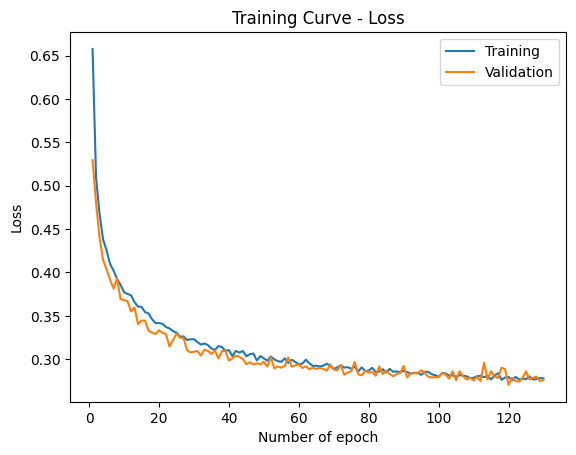

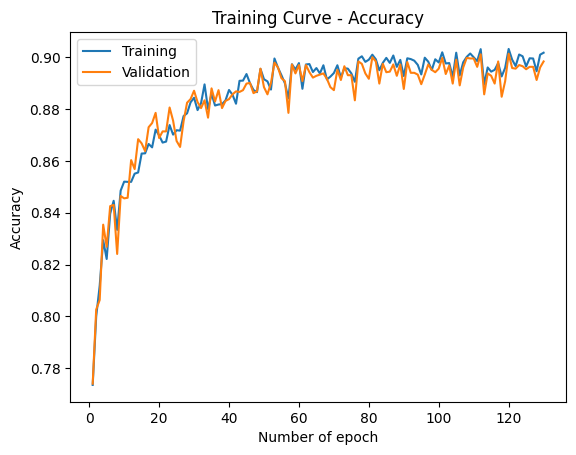

Average precision: 0.874655632820169
Average recall: 0.8931847688682387


In [ ]:
# Other hyperparameters tuning

batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model = DNN()
train(model, train_loader, val_loader, learning_rate=0.001)

model.eval()
with torch.no_grad():
  outputs = model(X_val_tensor)
  probs = torch.softmax(outputs, dim=1)
  preds = probs.argmax(dim=1)

precision, recall = [0, 0, 0], [0, 0, 0]
for i in range(3):
  precision[i] = precision_score(y_val == i, preds == i, zero_division=0)
  recall[i] = recall_score(y_val == i, preds == i, zero_division=0)

print('Average precision:', np.average(precision))
print('Average recall:', np.average(recall))

In [ ]:
# Model saving
model_state_dict = model.state_dict()
torch.save(model_state_dict, 'model_parameters.pth')

In [ ]:
result = {
  'Batch Size': [16, 32, 64, 128, 16, 32, 64, 128, 256, 512, 32, 64, 128, 256, 512, 256, 512],
  'Learning Rate': [0.0001, 0.0001, 0.0001, 0.0001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.1, 0.1],
  # Note: values below refer to the those of the epoch with lowest validation loss (averaged over 3 trials).
  'Final Validation Accuracy': [0.8926, 0.8963, 0.8846, 0.8896, 0.8931, 0.8947, 0.8984, 0.9001, 0.8962, 0.8914, 0.8487, 0.8763, 0.8864, 0.8872, 0.8856, 0.6985, 0.7935],
  'Average Final Precision': [0.8702, 0.8729, 0.8546, 0.8668, 0.8655, 0.8694, 0.8714, 0.8725, 0.8688, 0.8706, 0.8211, 0.8465, 0.8677, 0.8624, 0.8609, 0.4843, 0.7988],
  'Average Final Recall': [0.8670, 0.8771, 0.8701, 0.8666, 0.8824, 0.8787, 0.8955, 0.8920, 0.8833, 0.8657, 0.8237, 0.8584, 0.8585, 0.8683, 0.8628, 0.4830, 0.7262]
}
df_result = pd.DataFrame(result)
df_result

,Batch Size,Learning Rate,Final Validation Accuracy,Average Final Precision,Average Final Recall
0,16,0.0001,0.8926,0.8702,0.8670
1,32,0.0001,0.8963,0.8729,0.8771
2,64,0.0001,0.8846,0.8546,0.8701
3,128,0.0001,0.8896,0.8668,0.8666
4,16,0.0010,0.8931,0.8655,0.8824
5,32,0.0010,0.8947,0.8694,0.8787
6,64,0.0010,0.8984,0.8714,0.8955
7,128,0.0010,0.8962,0.8688,0.8833
8,256,0.0010,0.9001,0.8725,0.8920
9,512,0.0010,0.8914,0.8706,0.8657


Final Decision: Batch Size = 128, Learning Rate = 0.001.

**Observations**:

Too low learning rate leads to slower training and might get stuck in local minima, while too high learning rate might lead to instability, divergence and poor generalization.

Too small batch size results in unstable and erratic training, while too large batch size strains computational resources and is more likely to overfit.

Small/large batch size should come with low/high learning rate. Proper choice of learning rate and batch size provides a balance between convergence speed and model performance.

In [ ]:
# Model performance on test data
model = DNN()
model.load_state_dict(torch.load('model_parameters.pth'))
model.eval()

with torch.no_grad():
  outputs = model(X_test_tensor)
  probs = torch.softmax(outputs, dim=1)
  preds = probs.argmax(dim=1)
  test_acc = (preds == y_test_tensor).sum().item() / len(y_test_tensor)
  precision, recall = [0, 0, 0], [0, 0, 0]
  for i in range(3):
    precision[i] = precision_score(y_test == i, preds == i, zero_division=0)
    recall[i] = recall_score(y_test == i, preds == i, zero_division=0)

print('Test accuracy:', test_acc)
print('Test precision:', precision)
print('Test recall:', recall)

Test accuracy: 0.8964960811433841
Test precision: [0.9334130781499203, 0.8287560581583199, 0.8546655656482246]
Test recall: [0.8996925441967717, 0.8287560581583199, 0.9265890778871978]


In [ ]:
# Final model performance summary
result = {
  'Accuracy': [0.9032, 0.9013, 0.8965],
  'Precision': ['-', 0.8747, 0.8723],
  'Recall': ['-', 0.8932, 0.8850]
}
df_result = pd.DataFrame(result, index = ['Train', 'Validation', 'Test'])
df_result

,Accuracy,Precision,Recall
Train,0.9032,-,-
Validation,0.9013,0.8747,0.8932
Test,0.8965,0.8723,0.885


**Summary**

The test set was kept untouched until the very last step. For our final model, accuracy/precision/recall on test set is close to that on validation set, which indicates that the model has good generalization ability.

The model is very accurate in predicting normal status (high precision and recall). It also has good ability to distinguish TDA, although there might be some false alarms (high recall but low precision). Its weakness mainly lies in determining FDIA (low precision and recall), which might require more data to support model training (our dataset has least data for FDIA). In practice, we might have very different costs for false alarm and miss alarm. For possible future work, these can be taken into consideration for further model tuning.

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3
  libcommons-logging-java libcommons-parent-java libfontbox-java libgs9
  libgs9-common libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java
  libptexenc1 libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2
  libwoff1 libzzip-0-13 lmodern pandoc-data poppler-data preview-latex-style
  rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
  xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-

In [ ]:
!jupyter nbconvert --to pdf /content/EPIC_DNN.ipynb

[NbConvertApp] Converting notebook /content/ECE1513_nonDL.ipynb to pdf
[NbConvertApp] Writing 47308 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 47947 bytes to /content/ECE1513_nonDL.pdf
